# Laplacian Matrix

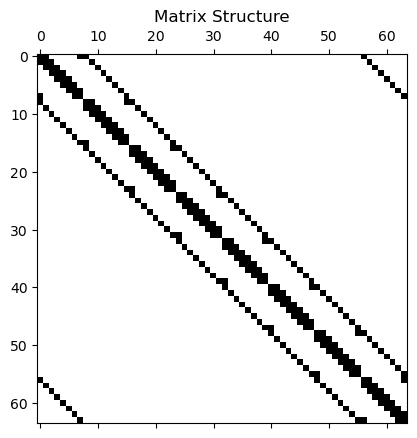

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

m = 8    # N value in x and y directions
n = m * m  # total size of matrix
L = 20
dx = L/m

e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0  # overwrite every m^th value with zero
    e4[m*j-1] = 1  # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# Place diagonal elements
diagonals = [e1.flatten(), e1.flatten(), e5.flatten(), 
             e2.flatten(), -4 * e1.flatten(), e3.flatten(), 
             e4.flatten(), e1.flatten(), e1.flatten()]
offsets = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]

matA = spdiags(diagonals, offsets, n, n).toarray()
A1 = matA / (dx**2)

# Plot matrix structure
#plt.figure(5)
plt.spy(A1)
plt.title('Matrix Structure')
plt.show()

# Del X

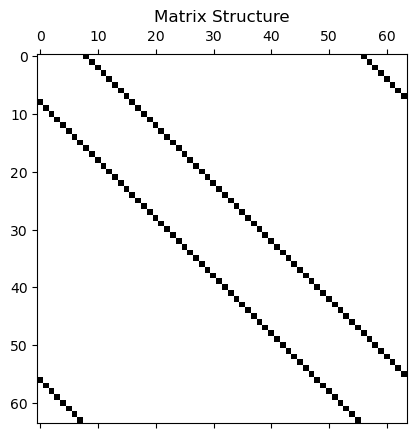

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

m = 8    # N value in x and y directions
n = m * m  # total size of matrix
L = 20
dx = L/m

offdiag_right = np.ones((n, 1))  # vector of ones
offdiag_left = -1*np.ones((n, 1))   # vector of ones
top_right = -1*np.ones((n, 1))   # copy the one vector
bottom_left = np.ones((n, 1))    # copy the zero vector

# Place diagonal elements
diagonals = [bottom_left.flatten(), offdiag_left.flatten(), offdiag_right.flatten(), top_right.flatten()]
offsets = [-(n-m), -m, m, (n-m)]

matB = spdiags(diagonals, offsets, n, n).toarray()
A2 = matB / (2 * dx)

# Plot matrix structure
#plt.figure(5)
plt.spy(A2)
plt.title('Matrix Structure')
plt.show()

# Del y

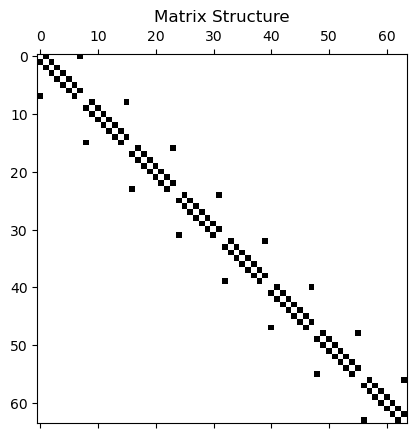

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

m = 8    # N value in x and y directions
n = m * m  # total size of matrix
L = 20
dx = L/m

offdiag_right = np.ones((n, 1))  # vector of ones
offdiag_left = -1*np.ones((n, 1))   # vector of ones
right_corner = np.zeros((n, 1))   # copy the one vector
left_corner = np.zeros((n, 1))    # copy the zero vector

for j in range(m):
    right_corner[(j + 1) * m - 1] = -1  # overwrite every m^th value with zero
    left_corner[j * m] = 1   # overwirte every m^th value with one
    
    # Ensure no connections between blocks by setting off-diagonals to zero at row boundaries
    if j < m - 1:  # Avoid setting zero in the final row's boundary
        offdiag_right[(j + 1) * m ] = 0
        offdiag_left[(j + 1) * m-1] = 0

    

# Place diagonal elements
diagonals = [left_corner.flatten(), offdiag_left.flatten(), offdiag_right.flatten(), right_corner.flatten()]
offsets = [-m+1, -1, 1, m-1]

matC = spdiags(diagonals, offsets, n, n).toarray()
A3 = matC / (2 * dx)

# Plot matrix structure
plt.spy(A3)
plt.title('Matrix Structure')
plt.show()
